In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


train_dir = "C:/Users/Maitr/Desktop/accuracy check/new data/train"
test_dir = "C:/Users/Maitr/Desktop/accuracy check/new data/Test_Rescaled"

img_size = 224
batch_size = 16


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical"
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


base_model = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(img_size, img_size, 3)
)


for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.3)(x)
predictions = Dense(4, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=predictions)


model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


history = model.fit(
    train_gen,
    epochs=20,
    validation_data=test_gen
)


model.save("resnet50_fungalinfection_classifier.h5")


loss, acc = model.evaluate(test_gen)
print("Test Accuracy:", acc)


Found 4448 images belonging to 4 classes.
Found 1846 images belonging to 4 classes.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,850,500 (90.98 MB)

 Trainable params: 262,788 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

C:\Users\Maitr\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 159s 551ms/step - accuracy: 0.3051 - loss: 1.4179 - val_accuracy: 0.5563 - val_loss: 1.2194
Epoch 2/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 144s 519ms/step - accuracy: 0.3548 - loss: 1.3201 - val_accuracy: 0.6479 - val_loss: 1.0490
Epoch 3/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 151s 543ms/step - accuracy: 0.3593 - loss: 1.2896 - val_accuracy: 0.5618 - val_loss: 1.1139
Epoch 4/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 155s 558ms/step - accuracy: 0.3746 - loss: 1.2673 - val_accuracy: 0.5964 - val_loss: 1.0523
Epoch 5/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 153s 552ms/step - accuracy: 0.3737 - loss: 1.2606 - val_accuracy: 0.6121 - val_loss: 1.0847
Epoch 6/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 149s 534ms/step - accuracy: 0.3851 - loss: 1.2575 - val_accuracy: 0.4989 - val_loss: 1.2852
Epoch 7/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 148s 533ms/step - accuracy: 0.3982 - loss: 1.2491 - val_accuracy: 0.6186 - val_loss: 0.9935
Epoch 8/20
278/278 ━━━━━━━━━━━━━━━━━━━━ 148s 531ms/step - accuracy: 0.3898 -

116/116 ━━━━━━━━━━━━━━━━━━━━ 47s 405ms/step - accuracy: 0.6744 - loss: 0.8952
Test Accuracy: 0.6744312047958374


In [3]:
train_acc = history.history["accuracy"][-1]
print("Final Training Accuracy:", train_acc)


Final Training Accuracy: 0.441546767950058


In [4]:
val_acc = history.history["val_accuracy"][-1]
print("Final Validation Accuracy:", val_acc)


Final Validation Accuracy: 0.6744312047958374


In [5]:
CLASS_LABELS = ["Healthy", "Onychomycosis", "Tinea Corporis", "Tinea Nigra"]


In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import cv2

IMG_SIZE = 224  

def load_and_preprocess(img_path):
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0           
    return img, img_array
def predict_single_image(model, img_path):
    original_img, img_array = load_and_preprocess(img_path)

    preds = model.predict(img_array)[0]   
    predicted_index = np.argmax(preds)
    predicted_class = CLASS_LABELS[predicted_index]
    confidence = preds[predicted_index] * 100

    print("Predicted Class:", predicted_class)
    print("Confidence:", f"{confidence:.2f}%")

    return original_img, predicted_class, confidence
img_path = r"C:/Users/Maitr/Desktop/accuracy check/new data/Test_Rescaled/Tinea Nigra/rescaled_113_2567240.jpg"

original_img, pred_class, conf = predict_single_image(model, img_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: Onychomycosis
Confidence: 32.56%


In [7]:
y_true = test_gen.classes                           
y_pred_proba = model.predict(test_gen)              
y_pred = y_pred_proba.argmax(axis=1)                 


116/116 ━━━━━━━━━━━━━━━━━━━━ 44s 367ms/step


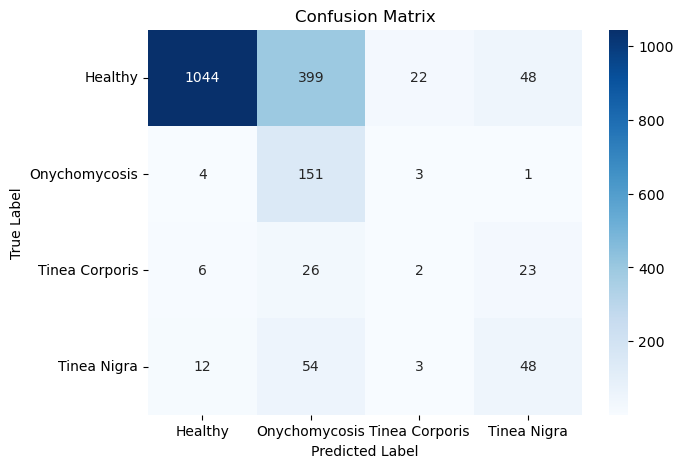

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=CLASS_LABELS,
            yticklabels=CLASS_LABELS)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
